<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Environment" data-toc-modified-id="Load-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Environment</a></span><ul class="toc-item"><li><span><a href="#Load-raw-data" data-toc-modified-id="Load-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load raw data</a></span></li></ul></li><li><span><a href="#Time-Domain-(The-same-time,-different-axes)" data-toc-modified-id="Time-Domain-(The-same-time,-different-axes)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Domain (The same time, different axes)</a></span><ul class="toc-item"><li><span><a href="#run-state" data-toc-modified-id="run-state-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>run state</a></span></li><li><span><a href="#walk-state" data-toc-modified-id="walk-state-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>walk state</a></span></li></ul></li><li><span><a href="#Frequency-Domain" data-toc-modified-id="Frequency-Domain-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequency Domain</a></span><ul class="toc-item"><li><span><a href="#run-state" data-toc-modified-id="run-state-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>run state</a></span></li><li><span><a href="#walk-state" data-toc-modified-id="walk-state-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>walk state</a></span></li></ul></li></ul></div>

# Load Environment

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import datetime as dt
from scipy import signal, interpolate, fftpack

DIRECTORY_PATH = 'wearable-motion-sensors/'
RUN_TOTAL_SAMPLE = 6
WALK_TOTAL_SAMPLE = 7
COLORS = ['blue', 'red', 'green', 'purple', 'gold', 'brown']
TAGS = ['x', 'y', 'z']

## Load raw data

In [2]:
run_df = []
for i in range(RUN_TOTAL_SAMPLE):
    run_df.append(pd.read_csv(DIRECTORY_PATH + 'run' + str(i + 1) + '.csv', header=None))
    run_df[i].columns = ['x', 'y', 'z', 'timestamp']

In [3]:
walk_df = []
for i in range(WALK_TOTAL_SAMPLE):
    walk_df.append(pd.read_csv(DIRECTORY_PATH + 'walk' + str(i + 1) + '.csv', header=None))
    walk_df[i].columns = ['x', 'y', 'z', 'timestamp']

# Time Domain (The same time, different axes)

## run state

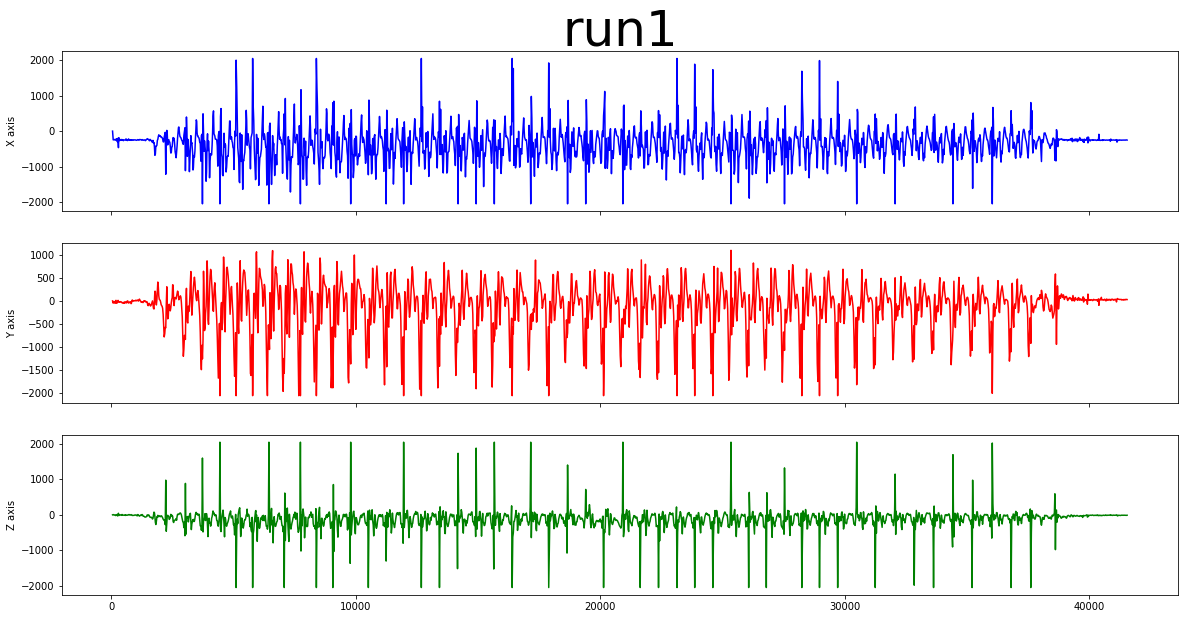

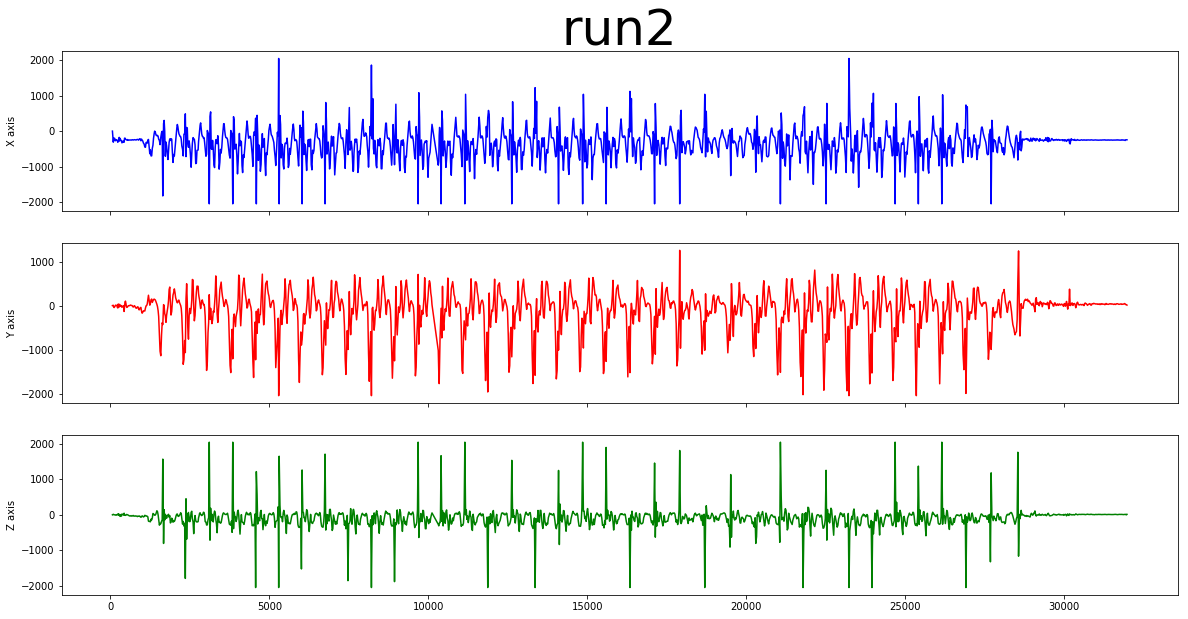

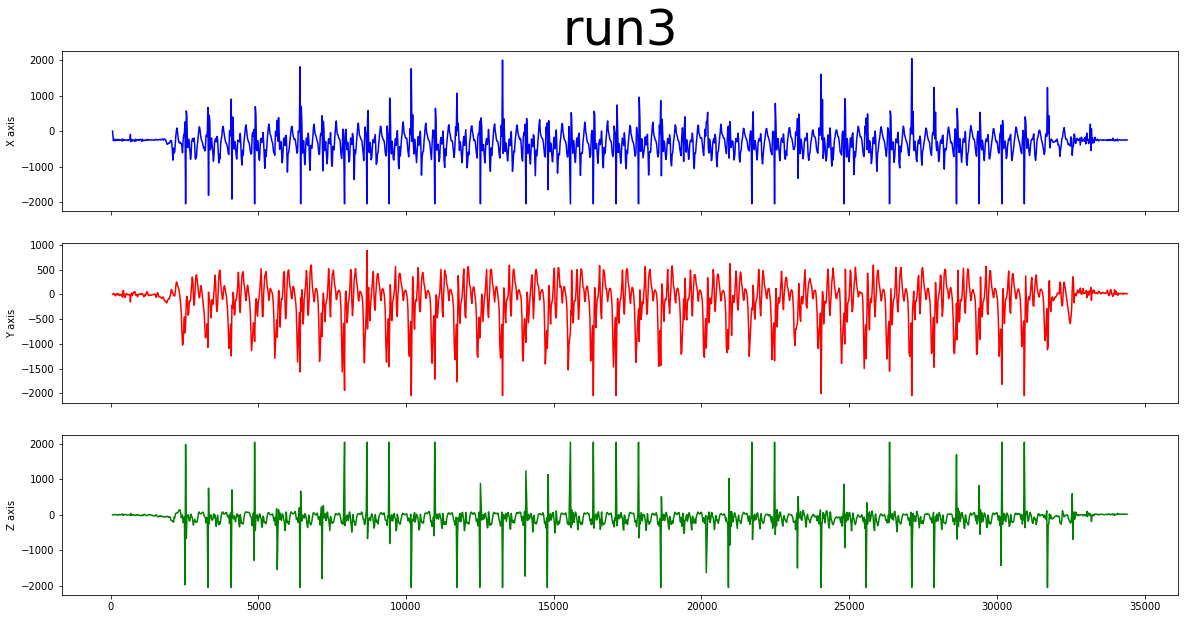

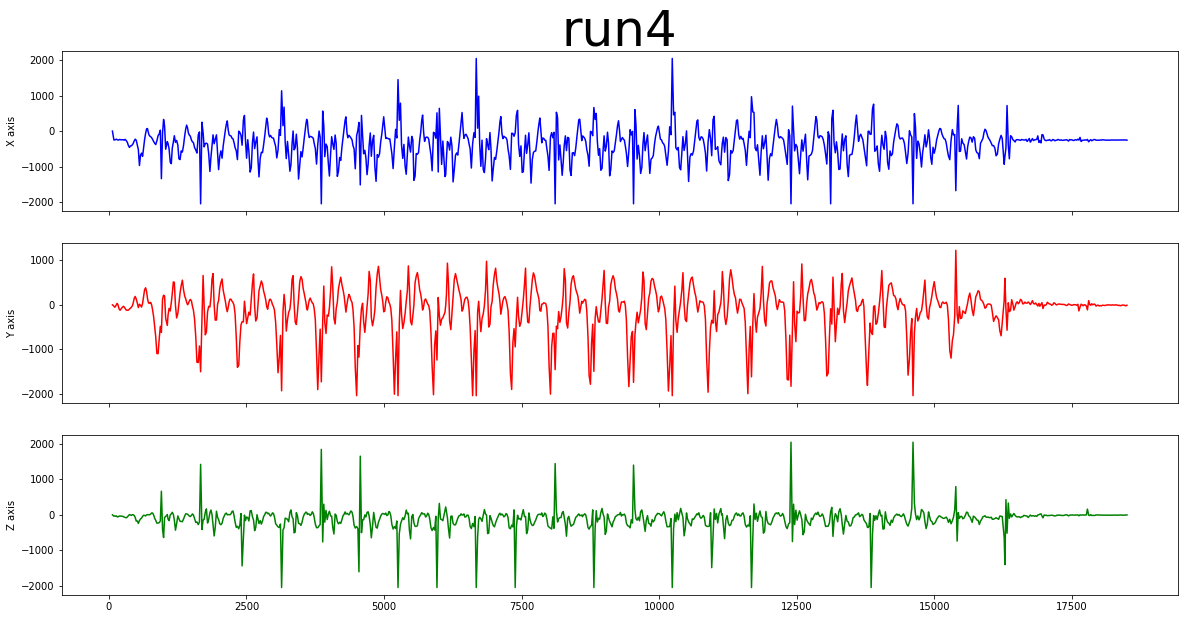

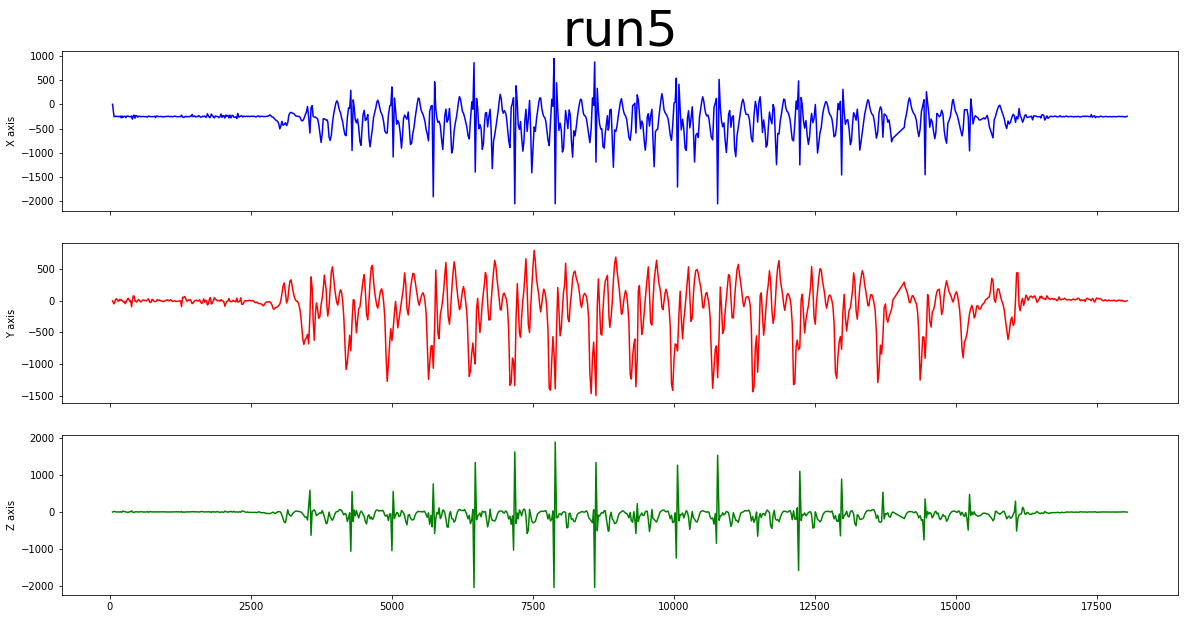

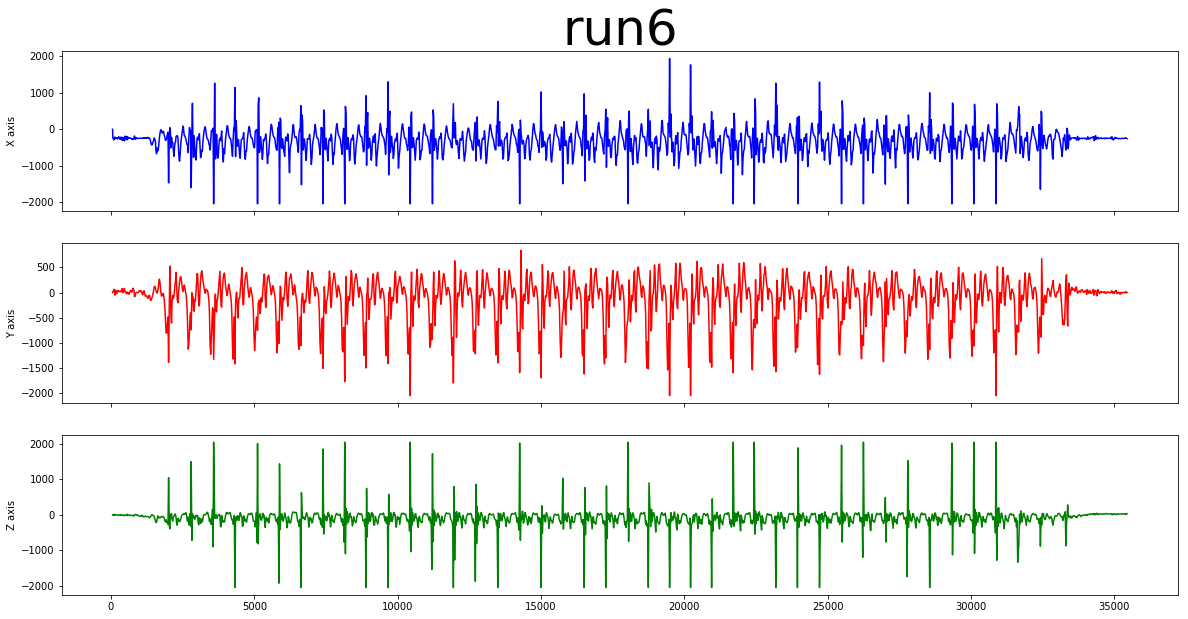

In [4]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        ax[j].plot(run_df[i]['timestamp'], run_df[i][TAGS[j]], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('run' + str(i + 1), fontsize=50)

plt.show()

## walk state

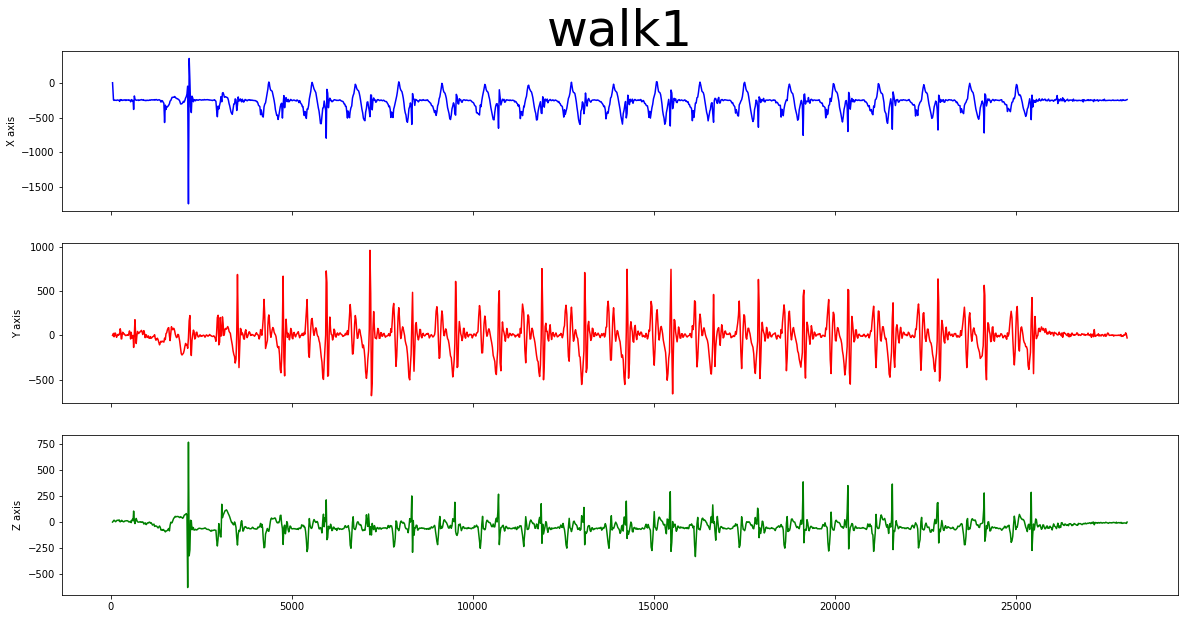

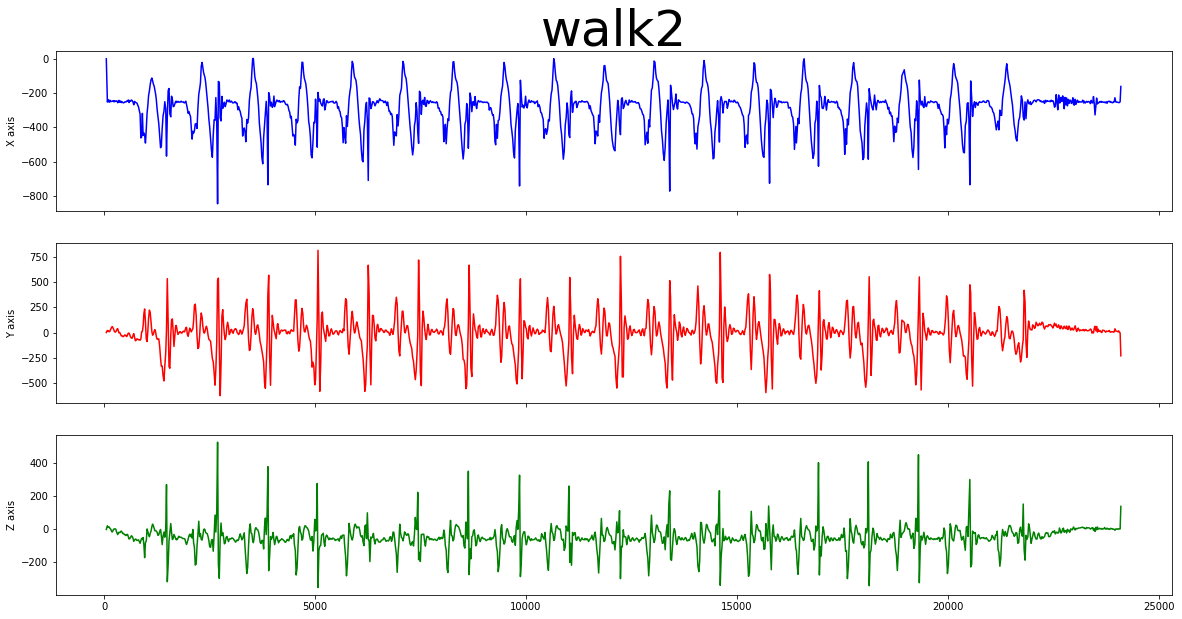

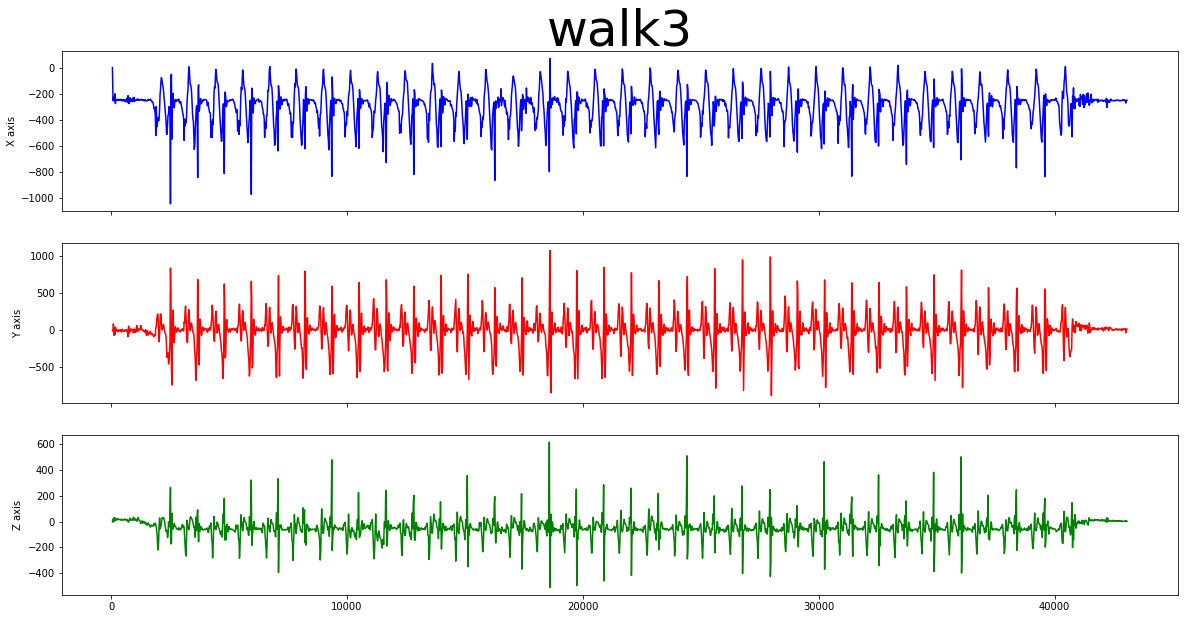

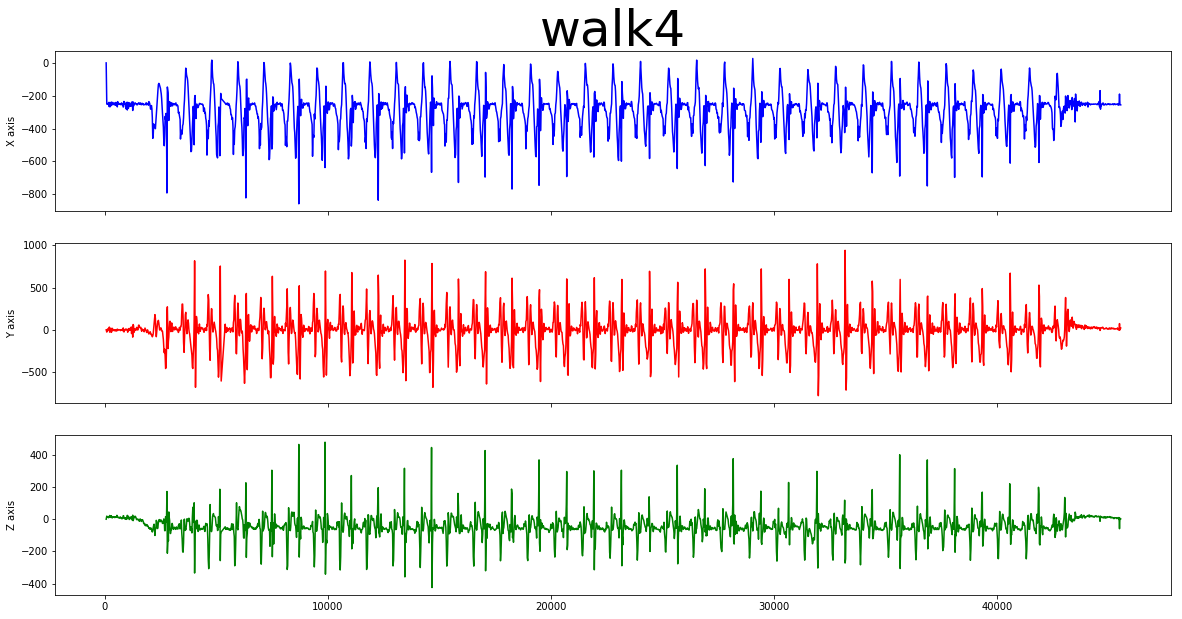

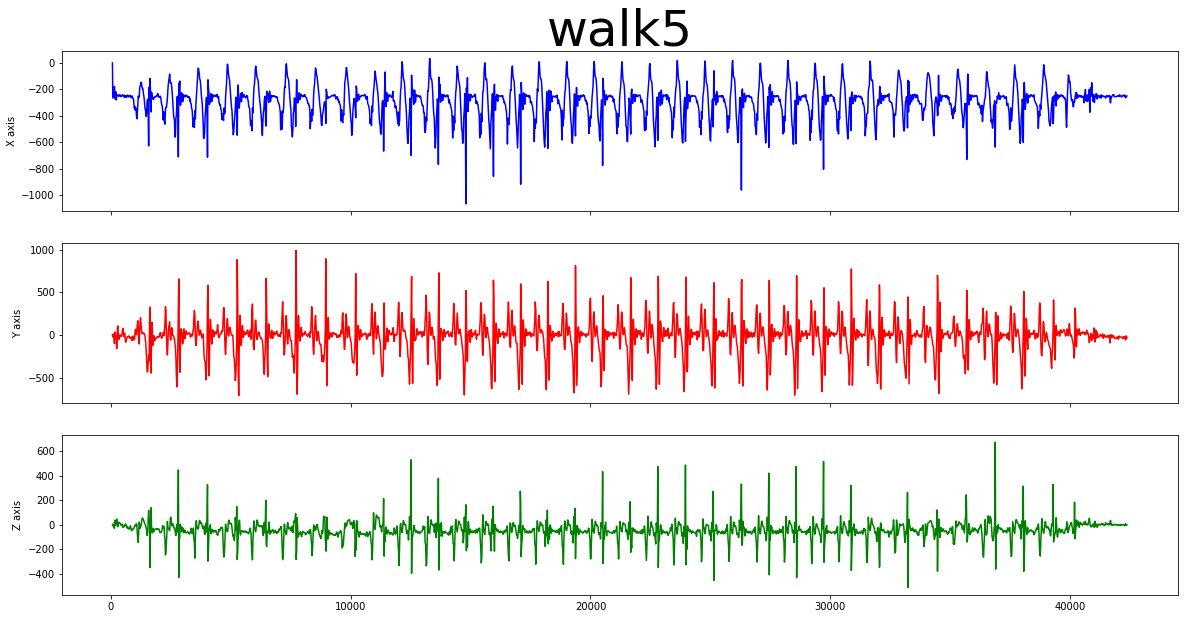

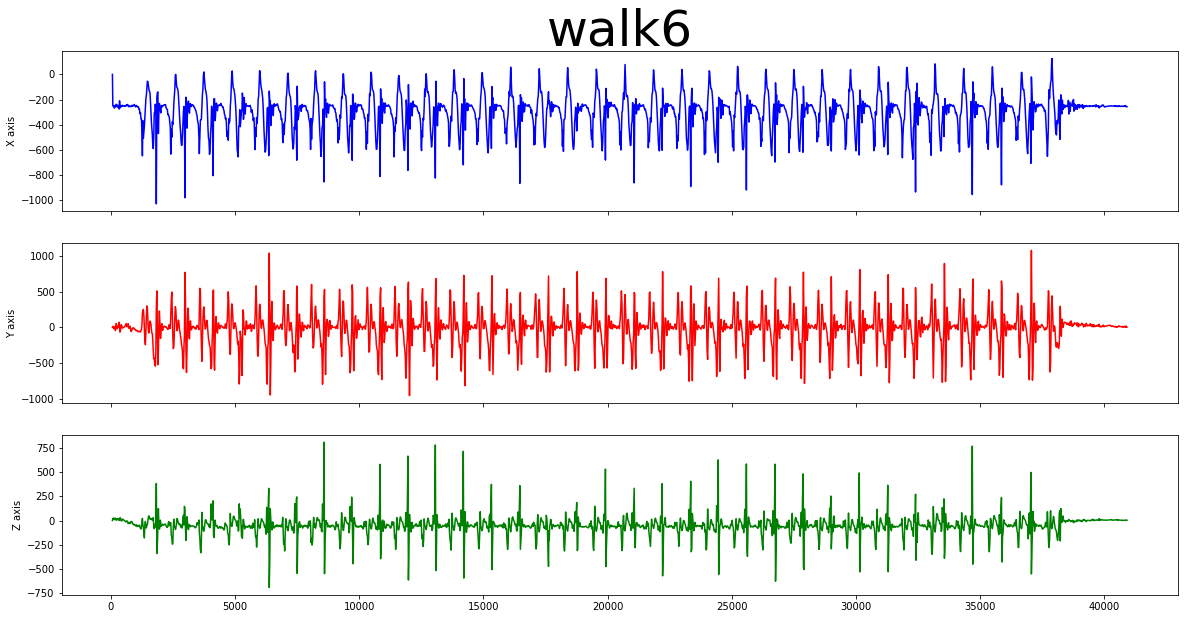

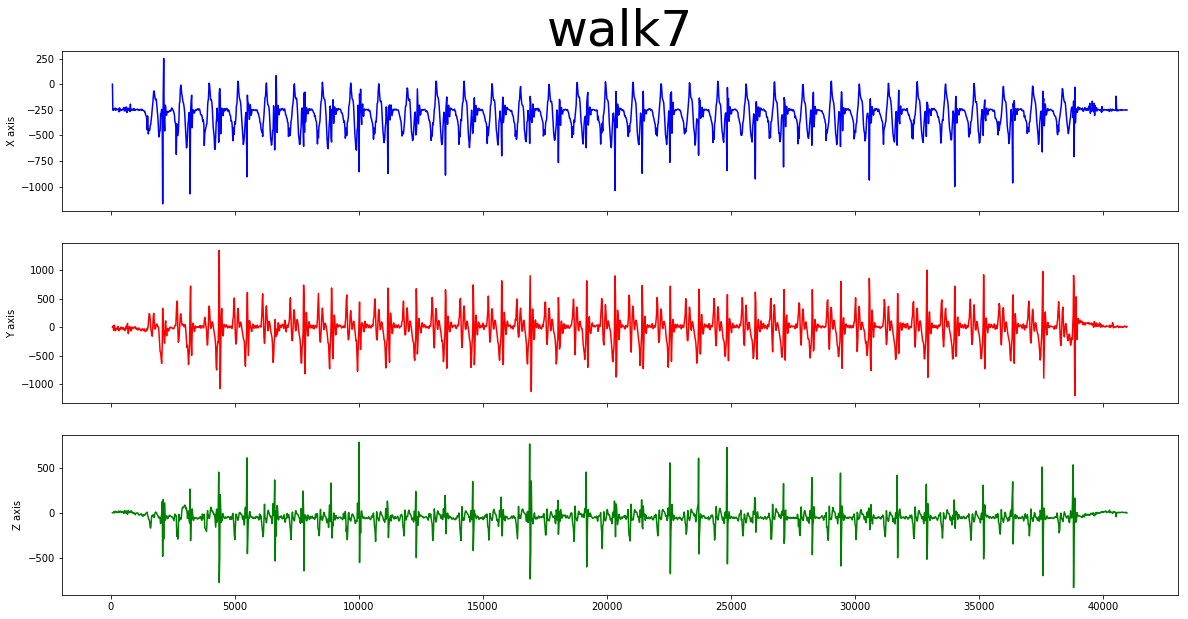

In [5]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        ax[j].plot(walk_df[i]['timestamp'], walk_df[i][TAGS[j]], color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name)
        
    ax[0].set_title('walk' + str(i + 1), fontsize=50)

plt.show()

# Frequency Domain

In [6]:
def FFT(xs):
    n = 2 ** 7

    fs = 1 / 16
    ps = 1 / fs

    spectrum = fftpack.fft(xs)
    spectrum_ss = 2 / n * np.abs(spectrum[0:n // 2])

    freq = np.linspace(0, fs / 2, int(n // 2))
    
    return freq, spectrum_ss

## run state

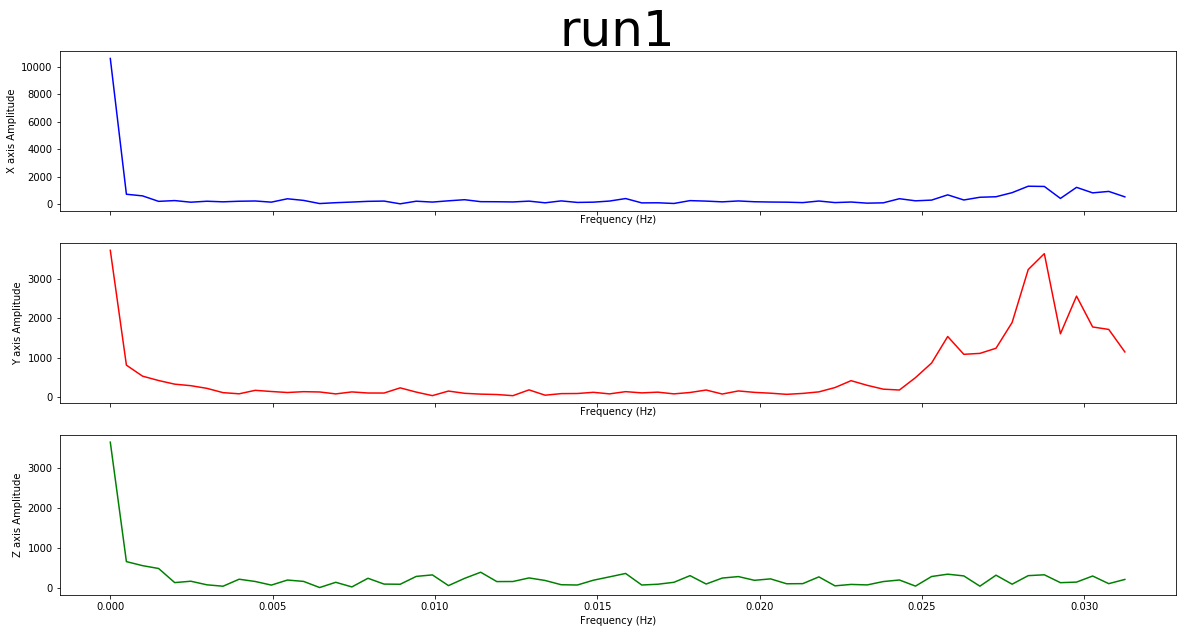

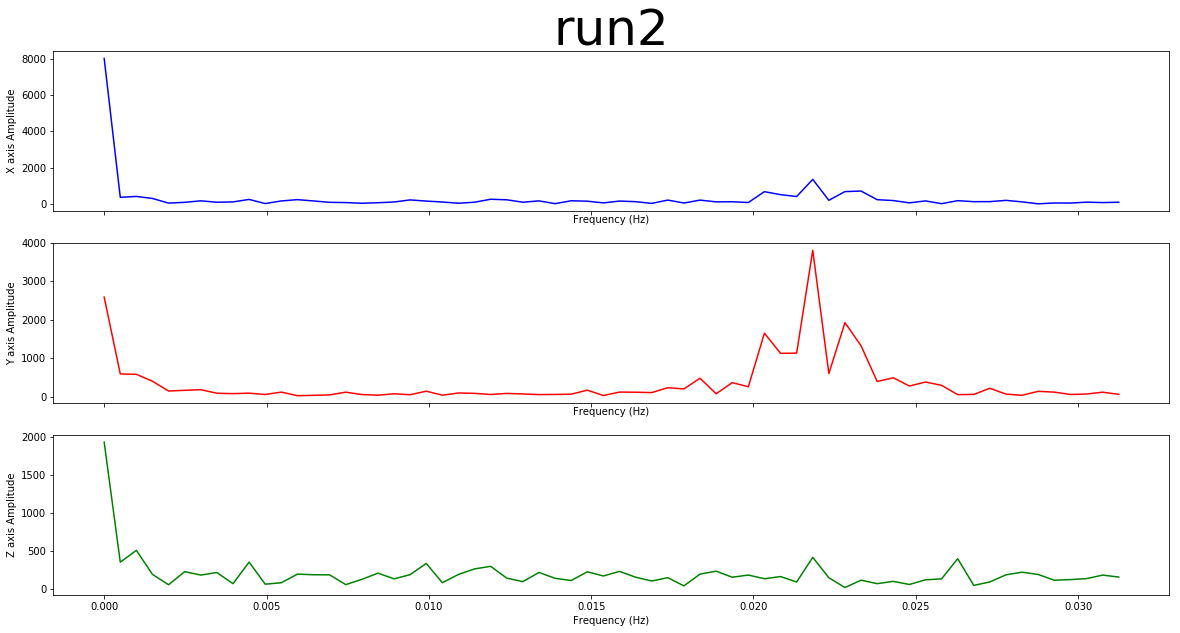

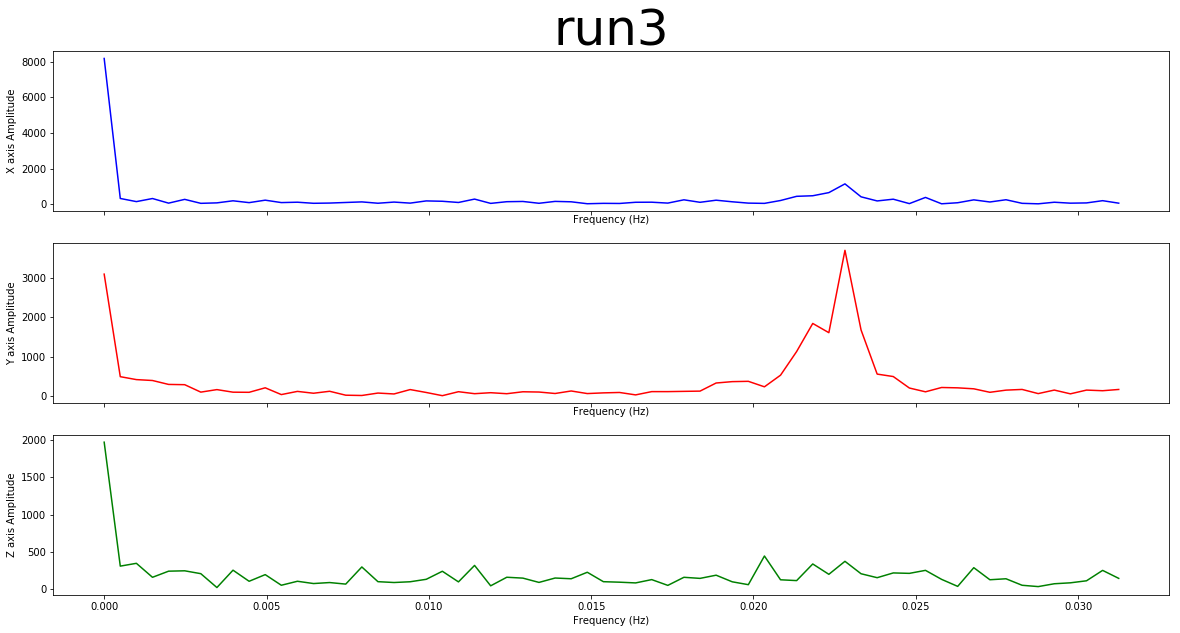

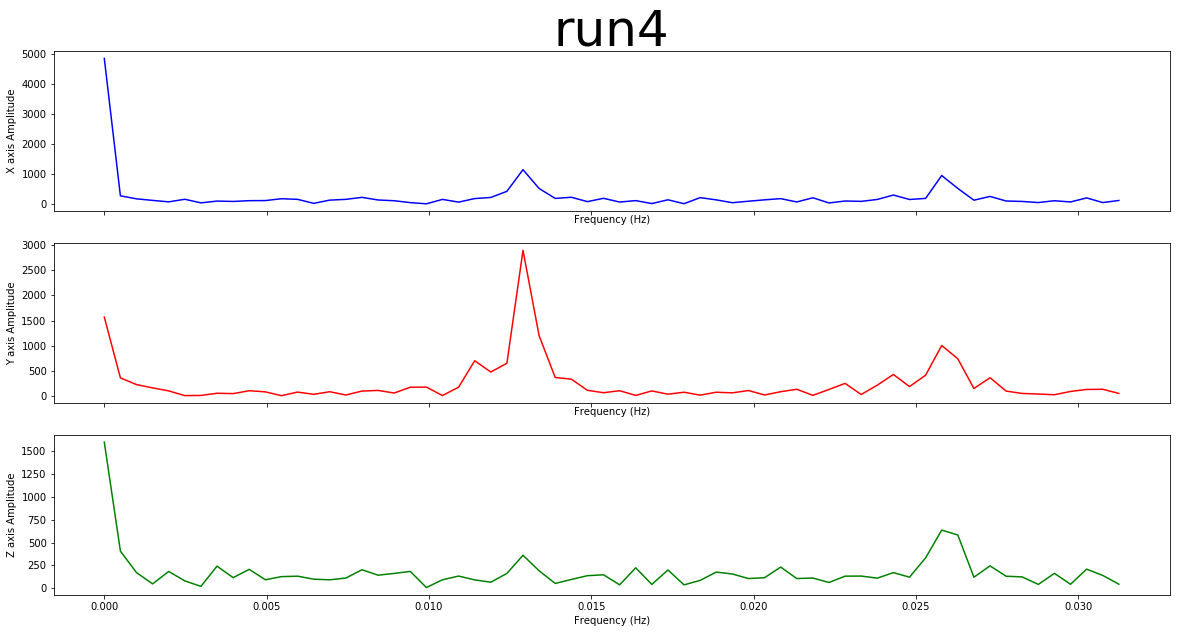

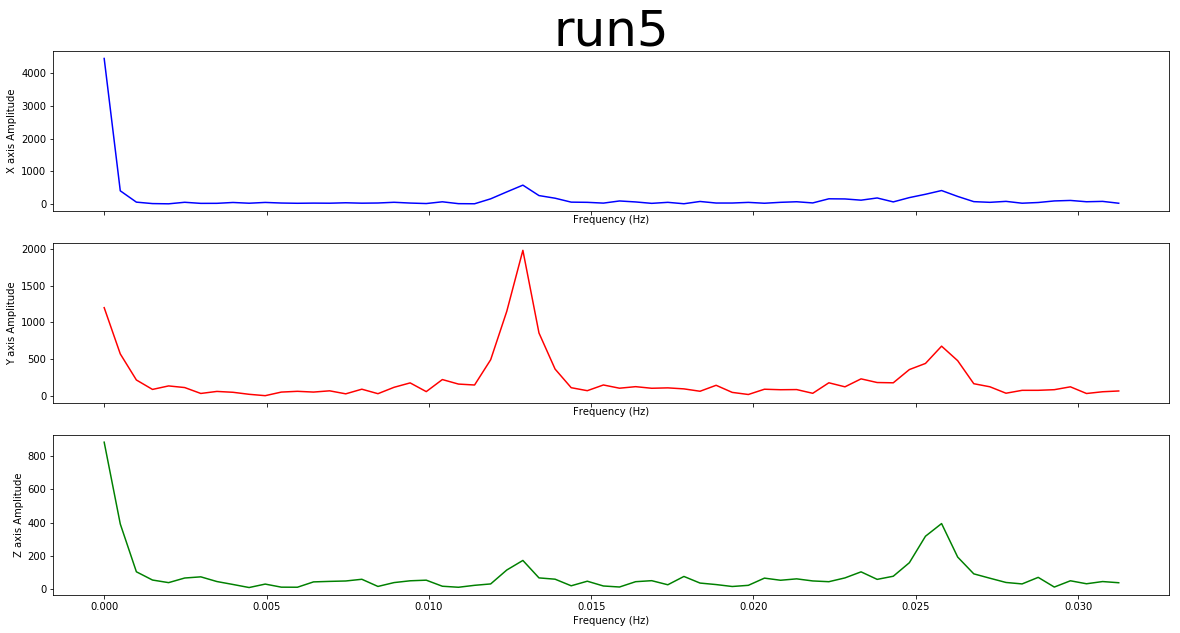

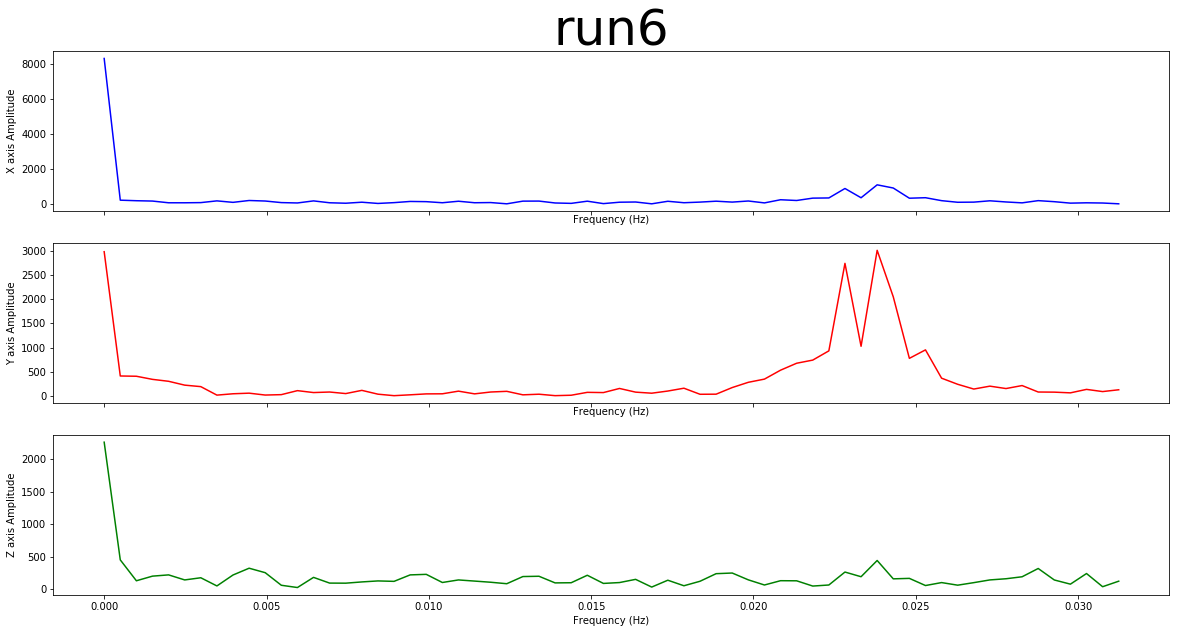

In [ ]:
for i in range(RUN_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        x, y = FFT(run_df[i][TAGS[j]])
        ax[j].plot(x, y, color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('run' + str(i + 1), fontsize=50)
plt.show()

## walk state

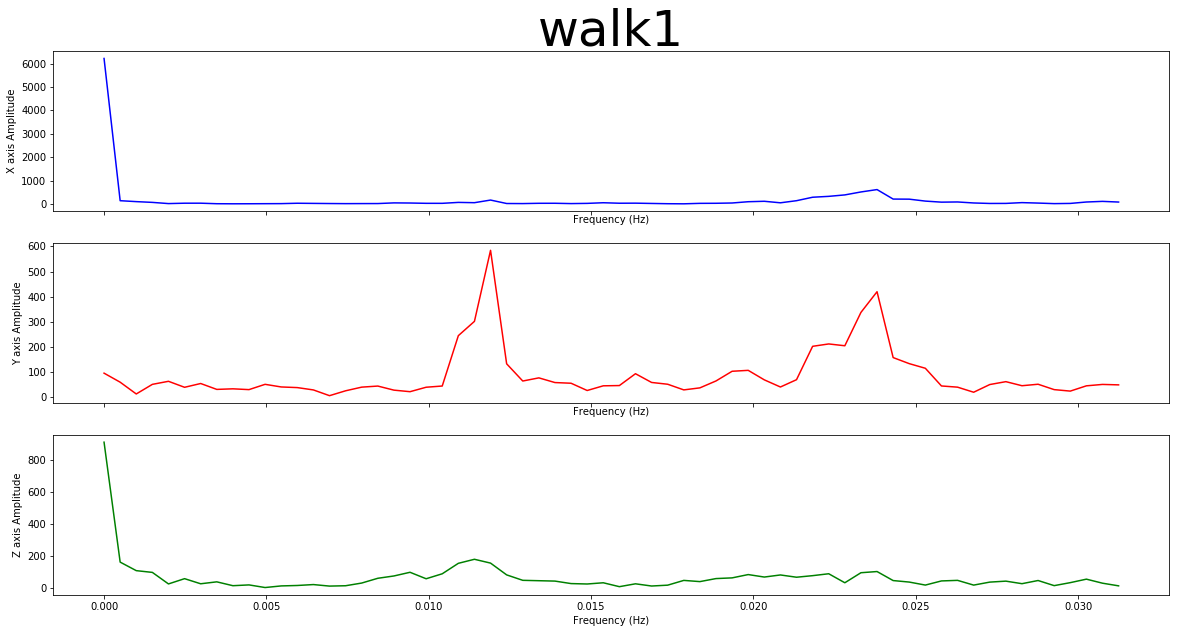

In [ ]:
for i in range(WALK_TOTAL_SAMPLE):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    for j in range(3):
        x, y = FFT(walk_df[i][TAGS[j]])
        ax[j].plot(x, y, color=COLORS[j])
        axis_name = TAGS[j].upper() + ' axis'
        ax[j].set_ylabel(axis_name + ' Amplitude')
        ax[j].set_xlabel('Frequency (Hz)')
        
    ax[0].set_title('walk' + str(i + 1), fontsize=50)
plt.show()